In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data

df = pd.read_parquet('path/to/the/file/data_jobs.parquet')

# A bit of cleaning up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert to a datetime datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert from 'str' to a list
df.sort_values(by='job_posted_date', inplace=True) # Sort the data by the date the job was added

# Which skill offers the best combination of high demand and high pay for Data Analysts, Data Engineers and Data Scientists?

In [2]:
# Filter the DataFrame to include only rows where the salary column is not NaN and job title is Data Analyst (almost 200k job offers)
df_DA_jobs = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA_jobs = df_DA_jobs.dropna(subset=['salary_year_avg'])

In [3]:
df_DA_jobs_exploded = df_DA_jobs.explode('job_skills')

In [4]:
df_DA_jobs_exploded = df_DA_jobs_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(
    by='count', ascending=False)

df_DA_jobs_exploded = df_DA_jobs_exploded.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})

analyst_job_count = len(df_DA_jobs)

df_DA_jobs_exploded['skill_percent'] = df_DA_jobs_exploded['skill_count'] / analyst_job_count * 100

skill_percent = 5

df_DA_skills_high_demanded = df_DA_jobs_exploded[df_DA_jobs_exploded['skill_percent'] > skill_percent]

df_DA_skills_high_demanded

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


In [36]:
# Filter the DataFrame to include only rows where the salary column is not NaN and job title is Data Engineer (2nd most demanded job)
df_DE_jobs = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE_jobs = df_DE_jobs.dropna(subset=['salary_year_avg'])

In [37]:
df_DE_jobs_exploded = df_DE_jobs.explode('job_skills')

In [38]:
df_DE_jobs_exploded = df_DE_jobs_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(
    by='count', ascending=False)

df_DE_jobs_exploded = df_DE_jobs_exploded.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})

engineer_job_count = len(df_DE_jobs)

df_DE_jobs_exploded['skill_percent'] = df_DE_jobs_exploded['skill_count'] / engineer_job_count * 100

skill_percent = 15

df_DE_skills_high_demanded = df_DE_jobs_exploded[df_DE_jobs_exploded['skill_percent'] > skill_percent]

df_DE_skills_high_demanded

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3180,125000.0,70.666667
python,3034,125000.0,67.422222
aws,1991,130000.0,44.244444
spark,1581,134775.0,35.133333
azure,1451,125000.0,32.244444
java,1149,134241.0,25.533333
snowflake,1071,132500.0,23.800000
kafka,866,140000.0,19.244444
hadoop,834,134241.0,18.533333


In [42]:
# Filter the DataFrame to include only rows where the salary column is not NaN and job title is Data Scientist (3nd most demanded job)
df_DS_jobs = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS_jobs = df_DS_jobs.dropna(subset=['salary_year_avg'])

In [43]:
df_DS_jobs_exploded = df_DS_jobs.explode('job_skills')

In [44]:
df_DS_jobs_exploded = df_DS_jobs_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(
    by='count', ascending=False)

df_DS_jobs_exploded = df_DS_jobs_exploded.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})

scientist_job_count = len(df_DS_jobs)

df_DS_jobs_exploded['skill_percent'] = df_DS_jobs_exploded['skill_count'] / scientist_job_count * 100

skill_percent = 10

df_DS_skills_high_demanded = df_DS_jobs_exploded[df_DS_jobs_exploded['skill_percent'] > skill_percent]

df_DS_skills_high_demanded

,skill_count,median_salary,skill_percent
job_skills,,,
python,4309,130500.0,72.762580
sql,3146,132500.0,53.123945
r,2484,125000.0,41.945289
tableau,1279,125000.0,21.597433
sas,1226,119000.0,20.702465
aws,1021,132500.0,17.240797
spark,944,135000.0,15.940561
tensorflow,637,140000.0,10.756501
azure,627,127500.0,10.587639


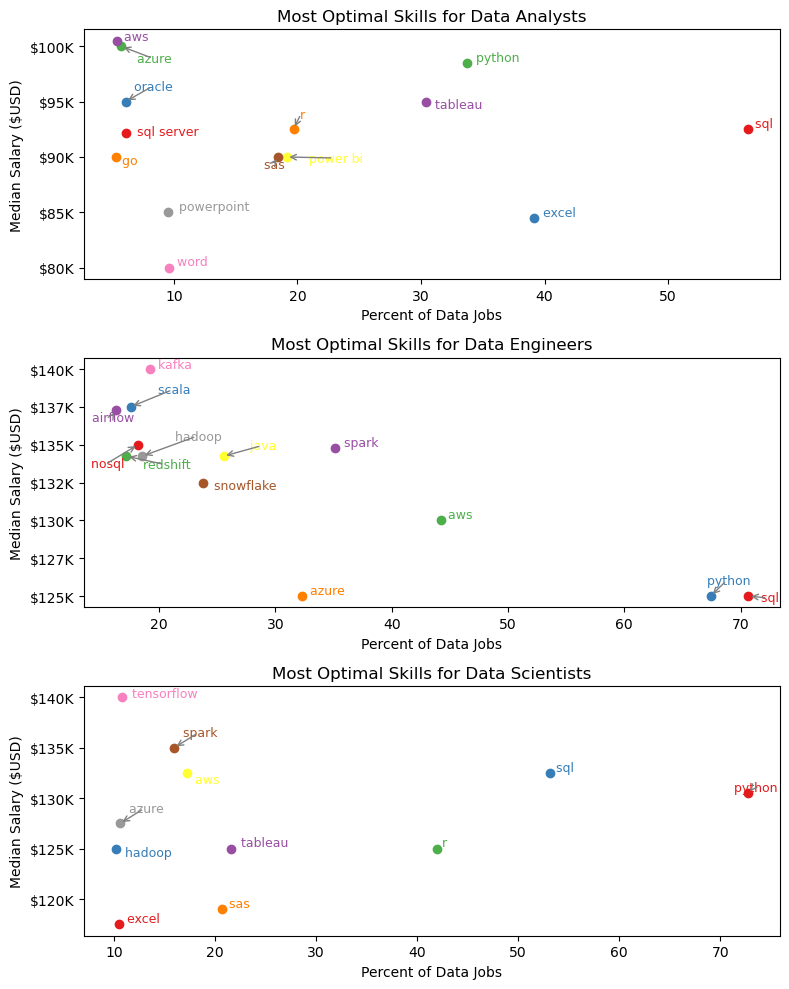

In [68]:
from adjustText import adjust_text

dfs = [df_DA_skills_high_demanded, df_DE_skills_high_demanded, df_DS_skills_high_demanded]
titles = ['Most Optimal Skills for Data Analysts', 'Most Optimal Skills for Data Engineers', 'Most Optimal Skills for Data Scientists']

colors = sns.color_palette('Set1', max(len(df) for df in dfs))

# Create a figure with 3 subplots in a single column
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Loop over each DataFrame and corresponding axis
for ax, df, title in zip(axs, dfs, titles):
    # Create a scatter with custom colors
    for i, (x, y) in enumerate(zip(df['skill_percent'], df['median_salary'])):
        ax.scatter(x, y, color=colors[i])
    
    # Set the labels and title
    ax.set_title(title)
    ax.set_xlabel('Percent of Data Jobs')
    ax.set_ylabel('Median Salary ($USD)')
    
    # Format the y-axis to show salaries in thousands
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
    
    # Create text annotations with corresponding colors
    texts = []
    for i, txt in enumerate(df.index):
        x = df['skill_percent'].iloc[i]
        y = df['median_salary'].iloc[i]
        texts.append(ax.text(x, y, " " + txt, fontsize=9, color=colors[i]))
    
    # Adjust text to avoid overlap and add arrows
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='->', color='gray'), 
                only_move={'points':'y', 'texts':'y'}, force_text=0.75, force_points=0.15)

plt.tight_layout()
plt.show()

It is important to note that the number of skills varies from chart to chart, as the percentages of individual job offers that require a skill vary for Data Analysts, Data Engineers and Data Scietists, as can be seen in the resulting tables above. For Data Analysts, the percentage threshold was set at 5%, which yielded the 14 most in-demand skills. However, for Data Engineers, the percentage is as high as 15%, as the percentage of demand for this skill also varies. In comparison, for Data Analysts, SQL is in demand 56.5% of the time. However, for Data Engineers it is almost 71%. If the percentages were also set to at least 5% to include the skill in the chart, the chart would be very unclear. The chart includes Data Engineers with the 13 most in-demand skills and Data Scientist the 11 most in-demand skills. The percentage threshold for Data Scientist to include a skill in the chart is set at 10%.